In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style="white", color_codes=True)

In [71]:
iris = pd.read_csv('iris.csv')

# EDA  
## 概览，可视化

In [72]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


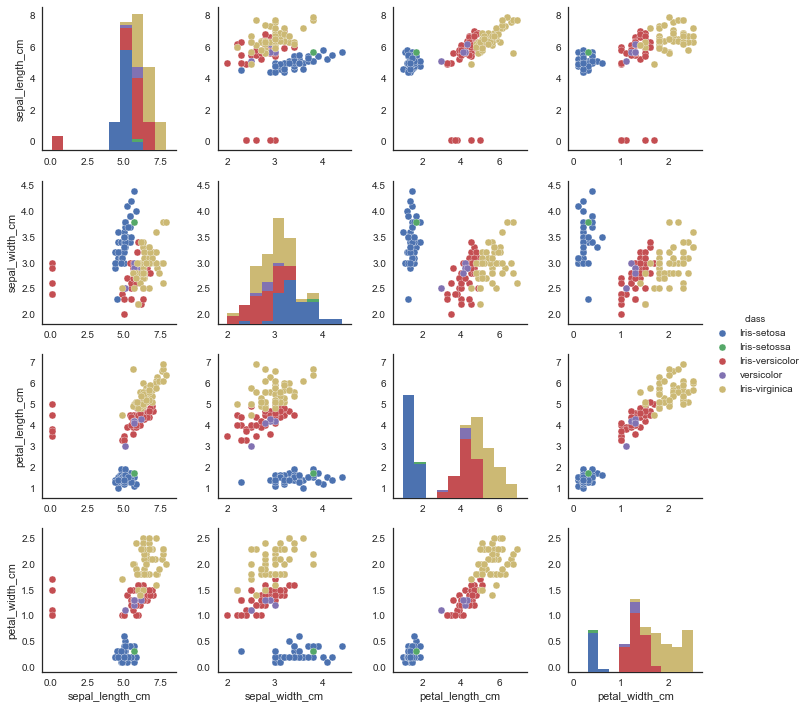

In [74]:
sns.pairplot(iris, hue='class')

## 用value_counts()统计类的个数

In [75]:
iris["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [76]:
iris.loc[iris["class"] == "Iris-setossa", 'class'] = "Iris-setosa"

In [77]:
iris.loc[iris["class"] == "versicolor", 'class'] = "Iris-versicolor"

In [79]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [78]:
iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

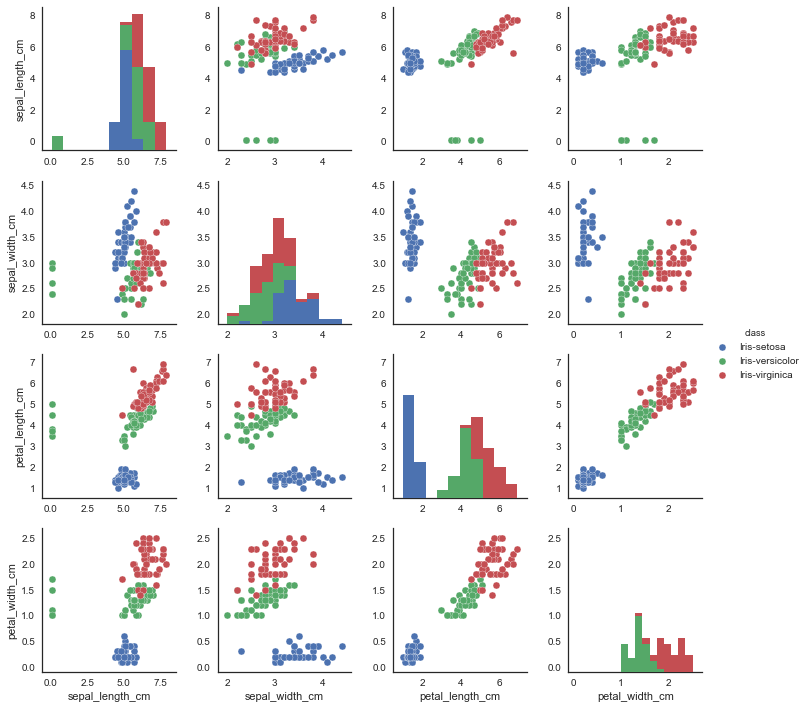

In [83]:
sns.pairplot(iris, hue='class')

## 查看缺失数据

In [82]:
iris[iris.isnull().values==True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [29]:
iris.isnull().values.any()

True

## 继续探索，查看数据类型

In [80]:
iris['sepal_length_cm'].describe()

count    150.000000
mean       5.644627
std        1.312781
min        0.055000
25%        5.100000
50%        5.700000
75%        6.400000
max        7.900000
Name: sepal_length_cm, dtype: float64

In [81]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [53]:
## iris[['sepal_length_cm']].astype(float)
## pd.to_numeric(iris['sepal_length_cm'])

## iris[['sepal_length_cm']].apply(pd.to_numeric)

## 使用pandas自带的画图函数

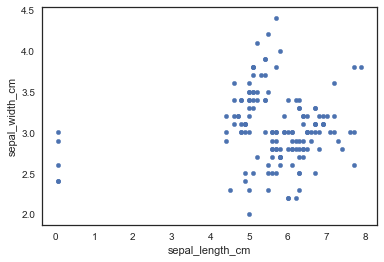

In [84]:
iris.plot(kind="scatter", x="sepal_length_cm", y="sepal_width_cm")

## 用seaborn进行探索

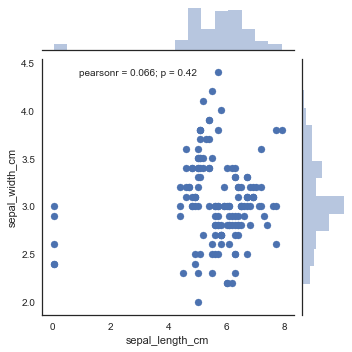

In [85]:
sns.jointplot(x='sepal_length_cm', y='sepal_width_cm', 
              data=iris, size=5)

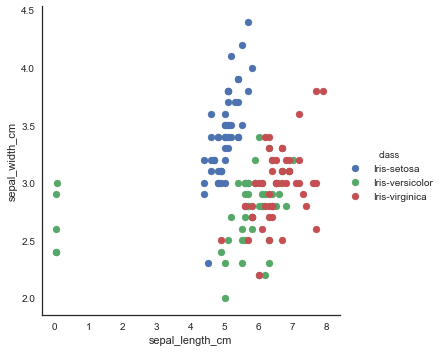

In [88]:
sns.FacetGrid(iris, hue='class', size=5) \
   .map(plt.scatter, 'sepal_length_cm', 'sepal_width_cm') \
   .add_legend()

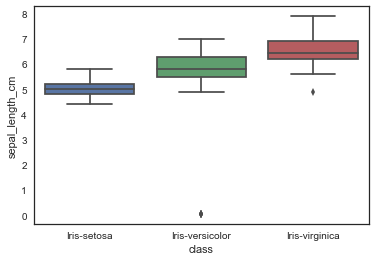

In [92]:
sns.boxplot(x='class', y='sepal_length_cm', data=iris)

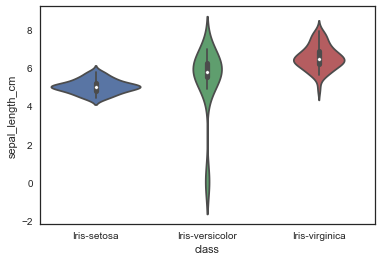

In [93]:
sns.violinplot(x='class', y='sepal_length_cm', data=iris, size=6)

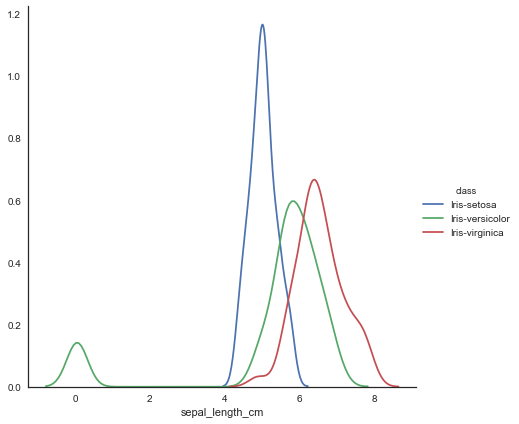

In [94]:
sns.FacetGrid(iris, hue="class", size=6) \
   .map(sns.kdeplot, "sepal_length_cm") \
   .add_legend()

## 联合的seaborn图

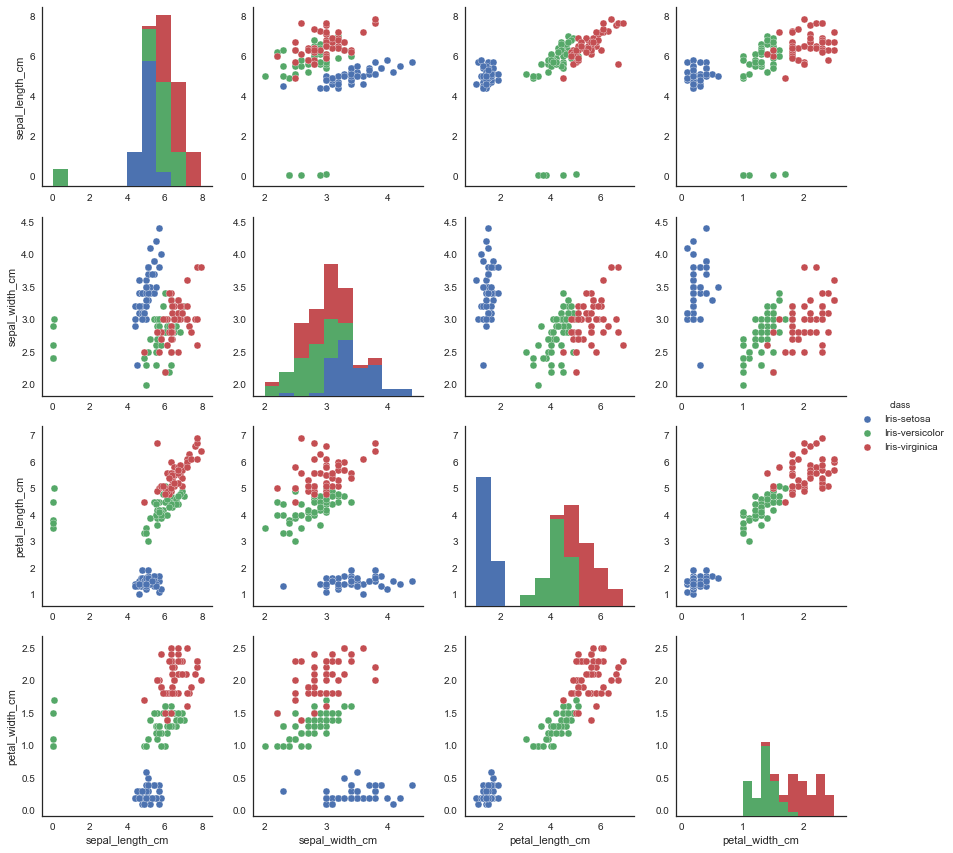

In [97]:
sns.pairplot(iris, hue="class", size=3)

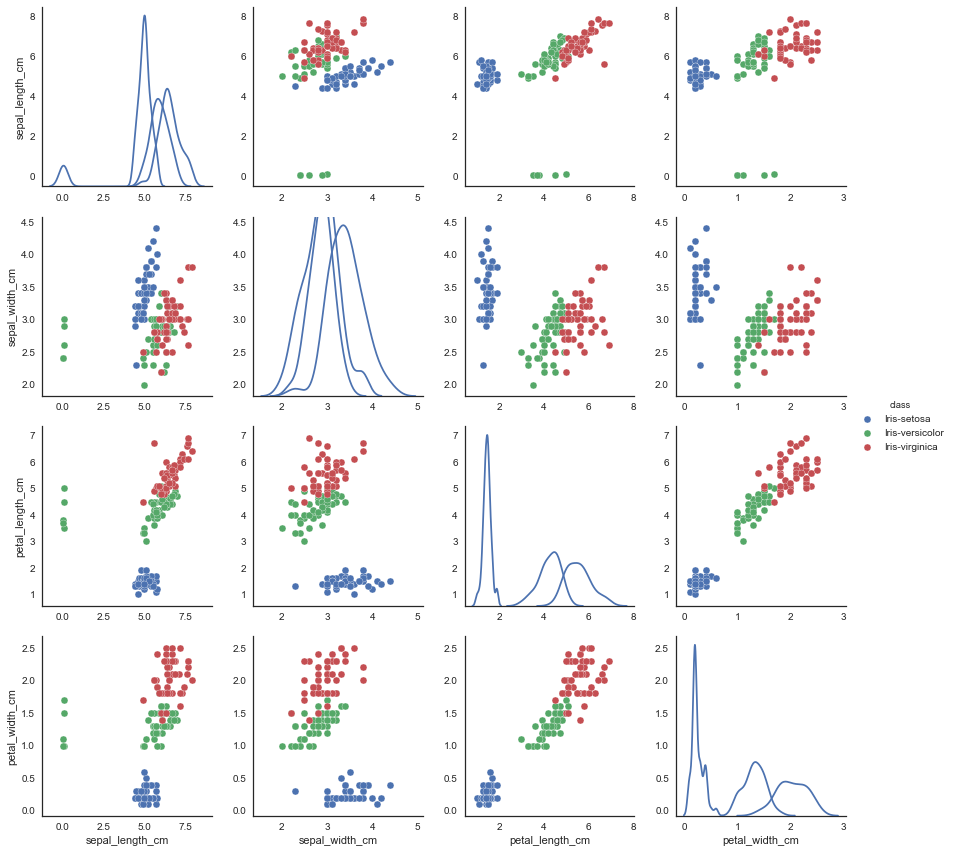

In [96]:
sns.pairplot(iris, hue="class", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d5c8860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1dd7a400>]], dtype=object)

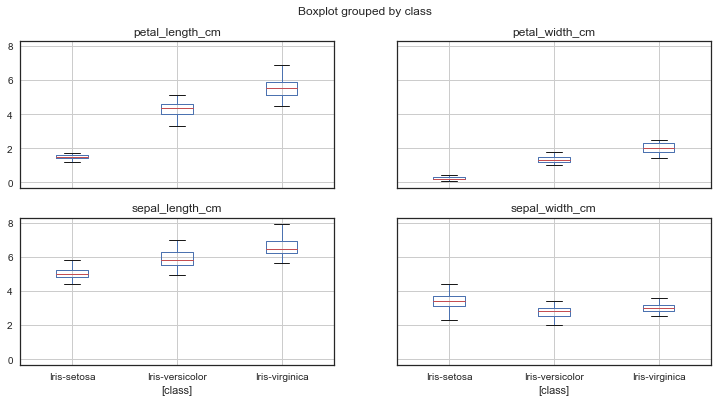

In [98]:
iris.boxplot(by="class", figsize=(12,6))

## 其他可视化  
## 安德鲁曲线

In [99]:
from pandas.tools.plotting import andrews_curves

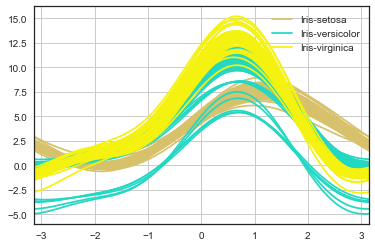

In [100]:
andrews_curves(iris, "class")

## 平行坐标

In [104]:
from pandas.tools.plotting import parallel_coordinates

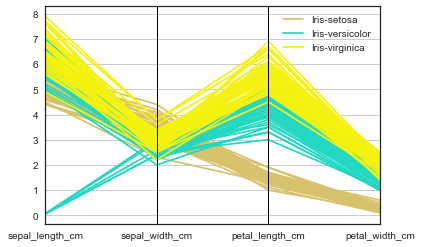

In [105]:
parallel_coordinates(iris, "class")

## 径向坐标可视化

In [106]:
from pandas.tools.plotting import radviz

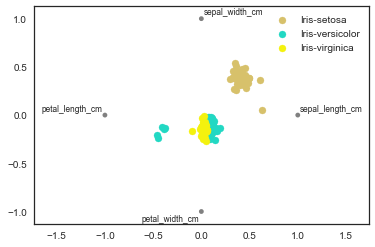

In [107]:
radviz(iris, "class")